# Topics (related to the midterm project):

## 1. Regular Expression (regex, or sometimes RE)
## 2. return vs. yield
## 3. random.sample, numpy.random, and histogram plots 

## Regular expression


###"The limits of my language mean the limits of my world."  

###\- Ludwig Wittgenstein


Resources:

* *Effective Computation in Physics * Chapter 8

* https://docs.python.org/2/library/re.html

### re.match(pattern, string, flags=0)


###pattern:	This is the regular expression to be matched.

###string:	This is the string, which would be searched to match the pattern at the beginning of string.

###flags:	You can specify different flags, e.g., to do case insensitive search, use flags = re.I (for all flags: https://docs.python.org/2/howto/regex.html)


### The match() function returns a match object on success, None on failure.  

### Use group(num) or groups() function of match object to get matched expression.


###*Note: match() checks for a match only at the beginning of the string*

In [1]:
# A match!
import re
m = re.match("20[01][0-9].*[0-9][0-9].*[0-9][0-9]", '2015-12-16')
print m
print m.group()

2015-12-16


In [2]:
# A match!  [0-9] --> \d
import re
m = re.match("20[01][0-9].*[0-9][0-9].*[0-9]\d", '2015-12-16')
print m
print m.group()

2015-12-16


In [3]:
# No match
import re
m = re.match("20[01][0-9].*[0-9][ 0-9].*[0-9][0-9]", '20')
print m

None


In [4]:
# match or not?  '2015-12-16' --> '2015a12b16'
import re
m = re.match("20[01][0-9].*[ 0-9][ 0-9].*[0-9][0-9]", '2015a12b16')
if m:
    print m.group()

2015a12b16


In [ ]:
# match or not?  second '.*' --> [^a-z]
import re
m = re.match("20[ 01][ 0-9].*[0-9][0-9][^a-z][0-9][0-9]", '2015a12b16')
if m:
    print m.group()
else:
    print 'no match'

In [ ]:
# match or not?  [^a-z] --> [^a]
import re
m = re.match("20[ 01][ 0-9].*[0-9][0-9][^a][0-9][0-9]", '2015a12b16')
if m:
    print m.group()
else:
    print 'no match'

In [ ]:
# match or not?
import re
m = re.match("20[01][0-9].*[0-9][0-9].*[0-9][0-9]", '2019adlkfj are1216')
if m:
    print m.group()
else:
    print 'no match'

In [5]:
# match or not?
import re
m = re.match(" 20[01][0-9].*[0-9][0-9].*[0-9][0-9]", '2015^12&16')
if m:
    print m.group()
else:
    print 'no match'

no match


In [6]:
# match or not?
import re
m = re.match("20[01][0-9].*[0-9][0-9].*[0-9][0-9]", 'Something very intereting \
will happen on 2015-12-16.  You just wait and see.')
if m:
    print m.group()
else:
    print 'no match'

no match


In [7]:
# match or not?
import re
m = re.match(".*20[01][0-9].*[0-9][0-9].*[0-9][0-9]", 'Something very intereting \
will happen on 2015-12-16.  You just wait and see.')
if m:
    print m.group()
else:
    print 'no match'

Something very intereting will happen on 2015-12-16


In [8]:
# Match or not?
import re
m = re.match(".*20[01][0-9]-[0-9][0-9]-[0-9][0-9]", 'Something very intereting \
will happen on 2015.12.16.  You just wait and see.')
print m

None


## re.search()

### If you want to locate a match anywhere in string, use search()

In [ ]:
import re
m = re.search("20[01][0-9]-[0-9][0-9]-[0-9][0-9]", 'Something very intereting \
will happen on 2015-12-16.  You just wait and see.')
print m
print m.group()

In [9]:
# the .group() method, and note: the second occurrence was ignored.
import re
m = re.search("(20[01][0-9])-([0-9][0-9])-([0-9][0-9])", 'Something very intereting \
will happen on 2015-12-16.  You just wait and see, only after 2015-12-16.')
print m.group()
print m.group(0)
print 'year:', m.group(1)
print 'month:', m.group(2)
print 'date:', m.group(3)

2015-12-16
2015-12-16
year: 2015
month: 12
date: 16


## re.search()

### To find all occurrences, and return the results as a list

In [52]:
# Match!
import re
m = re.findall("20[01][0-9]-[0-9][0-9]-[0-9][0-9]", 'Something very intereting \
will happen on 2015-12-16.  You just wait and see, only after 2015-12-18.')
print m, type(m)

['2015-12-16', '2015-12-18'] <type 'list'>


## Breakout Problem:

### The following text is copied from wikipedia,

### "The current men's world record is 9.58 seconds, set by Jamaica's Usain Bolt in 2009,"

### By using re.match(), extract the world record time.  You cannot use any actual words in your pattern, e.g. "seconds" would not be allowed.



In [73]:
m = re.match('.* ([0-9]*\.[0-9][0-9]).*', "The current men's world record is 9.58 seconds,\
set by Jamaica's Usain Bolt in 2009,")
print m.group(1)


9.58


## return vs. yield

In [77]:
# A peculiar thing about enumerate(): you can't use len() with enumerate()!
from collections import Iterable
y = range(10)
print len(y)
print isinstance(y, Iterable)
z = enumerate(range(10))
print isinstance(z, Iterable)
#print len(z)                     # will get error.
print z.next()
print z.next()
print y[3], z[3]                      # will also get error.

10
True
True
(0, 0)
(1, 1)
3

TypeError: 'enumerate' object has no attribute '__getitem__'

## eunmerate() *is* an iterable; but not all iterables have a length!

In [ ]:
# return:
def create_integers(N):
    lst=[]
    for i in range(N):
        lst.append(i)
    return lst
newints = create_integers(6)    
print newints 


In [ ]:
print type(create_integers), type(newints)


In [150]:
# yield:
from pdb import set_trace
def generate_integers(N):
    for i in range(N):
        # note: it's inside the for loop!
        yield i
        #set_trace()
        print 'The {:d}th time generate_integers() is called'.format(i+1)
gen = generate_integers(6)
print type(generate_integers), type(gen)


<type 'function'> <type 'generator'>


In [151]:
# It shows you that the next generate_integers() is called, 
# python starts from the statement immediately below the yield statement.
gen.next() 

0

In [161]:
for i in range(6):
    print gen.next()


StopIteration: 

In [162]:
# You will get error if the previous cell has been run.
for i in range(6):
    print gen.next()

StopIteration: 

##Breakout Problem: Write a function that generates all Fibonacci numbers less than 300 by using yield.  

Definition: F\_n = F\_{n-1} + F\_{n-2}; F\_0 = 0 and F\_1 = 1.  

Hint: Once you have calculated F\_3, you have no need for F\_0 and F\_1; 
once you know F\_4, you have no need for F\_3 and F\_2; and so forth.
So for every new round, you only need to keep the previous two numbers.

Computing by hand:
F\_0 = 0
F\_1 = 1
F\_2 = 1
F\_3 = 2
...

In [164]:
ind = 0
for i in fib():
    #print 'ind = ', ind
    ind += 1
    if i > 300:
        break
    else:
        print i
        
# Let's work out the flow of the code.
# This is an elegant, memory efficient way of generating Fibonacci numbers 
# (note: at any time only the latest two Fibonacci numbers take up memory, 
# as is necessary for the calculation of the next Fib number.   
# All previous Fib numbers are "forgotten"!)
# This is very different from the "list" way of doing things, where every element 
# takes up memory.


NameError: name 'fib' is not defined

## The random module

from http://docs.python.org/2/library/random.html:

In [1]:
import random
lst = ['a', 'b', 'c', 'd', 'x', 'y', 'z']
random.shuffle(lst)   ### this shuffles the list in place.  
print lst   ### you can run this as many times as you want.

['a', 'x', 'd', 'c', 'z', 'b', 'y']


##random.sample(population, k)

Return a k length list of unique elements chosen from the population sequence. 

Returns a new list containing elements from the population while leaving the original population unchanged. 


In [236]:
# Example of random.sample:
from random import sample
print sample(xrange(10000000), 10)
# Note the difference between xrange() and range(): xrange() doesn't create an entire list, 
# but creates the values when asked for them.
# So it's much better to use xrange() here owing to the large argument.

[4883254, 4833270, 2548403, 4802931, 8387459, 766568, 8236192, 9766441, 7066786, 2147452]


In [369]:
### Another example: 
from string import ascii_lowercase
print type(ascii_lowercase), len(ascii_lowercase)
# So yes, you can only import modules, functions but also strings and other objects.
# In Python: almost everything is an object (modules, functions, strings, ints, floats,
# dictionaries, lists, classes, etc.)
# and therefore, there is no fundamental difference between them in terms of how they
# are treated and used in Python.
print ascii_lowercase
print sample(ascii_lowercase, 26)

<type 'str'> 26
abcdefghijklmnopqrstuvwxyz
['y', 'i', 'r', 'h', 'z', 'f', 'n', 'b', 'd', 'x', 'q', 'j', 'a', 't', 'c', 'v', 'e', 'l', 'k', 'w', 'p', 'o', 'm', 'u', 's', 'g']


## ASCII stands for: American Standard Code for Information Interchange

## numpy.random

http://docs.scipy.org/doc/numpy/reference/routines.random.html

Gaussian distribution -- mu is the mean, and sigma is the standard deviation. 

In [579]:
from numpy.random import randn
x = randn(15) +348472334
print x

[  3.48472334e+08   3.48472333e+08   3.48472333e+08   3.48472333e+08
   3.48472335e+08   3.48472335e+08   3.48472334e+08   3.48472333e+08
   3.48472333e+08   3.48472333e+08   3.48472336e+08   3.48472337e+08
   3.48472334e+08   3.48472332e+08   3.48472335e+08]


In [736]:
import numpy as np
from numpy.random import randn
x = randn(10000000)*2. + 3.
print x
print np.mean(x)
print np.std(x)

[ 5.89592172  3.90028219  2.04110717 ...,  0.9511109   2.31539004
  2.24707392]
3.00077139122
1.99979896935


n (normalized height, or probability density): [  9.08256988e-05   9.08256988e-05   4.54128494e-05   3.63302795e-04
   3.17889946e-04   4.99541343e-04   6.35779892e-04   1.18073408e-03
   1.54403688e-03   2.22522962e-03   3.31513801e-03   4.49587209e-03
   5.58578048e-03   6.26697322e-03   7.94724865e-03   1.04449554e-02
   1.24431207e-02   1.51678917e-02   2.03903694e-02   2.05720208e-02
   2.27064247e-02   2.41596359e-02   2.52949571e-02   2.62032141e-02
   2.55220214e-02   2.57036728e-02   2.52495443e-02   2.64756912e-02
   2.27972504e-02   1.85284426e-02   1.88009197e-02   1.47591761e-02
   1.46683504e-02   1.07174325e-02   9.08256988e-03   6.67568886e-03
   6.85734026e-03   4.40504639e-03   4.22339499e-03   2.54311957e-03
   1.40779833e-03   1.27155978e-03   7.26605590e-04   6.35779892e-04
   2.72477096e-04   3.63302795e-04   2.27064247e-04   9.08256988e-05
   9.08256988e-05   4.54128494e-05] 50
bins (locations of bin edges): [  46.03605302   48.23807296   50.4400929    52.6421128

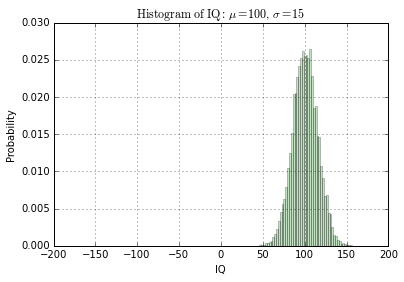

In [742]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


x = np.random.randn(10000)*15 + 100
fig = plt.figure()
ax = fig.add_subplot(111)

# the histogram of the data

Nbins = 50
# normed=1: the total area adds up to 1; # alpha: level of tranparency.
n, bins, patches = ax.hist(x, Nbins, normed=1, facecolor='green', alpha=0.235)
print 'n (normalized height, or probability density):', n, len(n)
print 'bins (locations of bin edges):', bins, len(bins)

# hist uses np.histogram under the hood to create 'n' and 'bins'.
# np.histogram returns the bin edges, so there will be Nbin probability
# density values (n), Nbin+1 bin edges (bins), and finally, Nbin patches.

ax.set_xlabel('IQ')
ax.set_ylabel('Probability')
# The is Latex, a typsetting "program".
ax.set_title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
# Pay attention to how the x and y axis limits are set.
ax.set_xlim(-200, 200)
ax.set_ylim(0, 0.03)
ax.grid(True)

plt.show()


## End of wk 6-1